In [2]:
# Here, importing important libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [3]:
# Here, Loading the dataset
df = pd.read_csv('car data.csv')
print(df.head(10))

        Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0           ritz  2014           3.35           5.59       27000    Petrol   
1            sx4  2013           4.75           9.54       43000    Diesel   
2           ciaz  2017           7.25           9.85        6900    Petrol   
3        wagon r  2011           2.85           4.15        5200    Petrol   
4          swift  2014           4.60           6.87       42450    Diesel   
5  vitara brezza  2018           9.25           9.83        2071    Diesel   
6           ciaz  2015           6.75           8.12       18796    Petrol   
7        s cross  2015           6.50           8.61       33429    Diesel   
8           ciaz  2016           8.75           8.89       20273    Diesel   
9           ciaz  2015           7.45           8.92       42367    Diesel   

  Selling_type Transmission  Owner  
0       Dealer       Manual      0  
1       Dealer       Manual      0  
2       Dealer       Manual   

In [4]:
# Here, Checking for missing values in dataset
print(df.isnull().sum())


Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64


In [5]:
# Here, Checking total numbers of rows in given dataset
print(df.index)

RangeIndex(start=0, stop=301, step=1)


In [6]:
# Here, Checking the items in columns of dataset
print(df.columns)

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')


In [9]:
# Here, Information about dataset
print(df.info)

<bound method DataFrame.info of     Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0       ritz  2014           3.35           5.59       27000    Petrol   
1        sx4  2013           4.75           9.54       43000    Diesel   
2       ciaz  2017           7.25           9.85        6900    Petrol   
3    wagon r  2011           2.85           4.15        5200    Petrol   
4      swift  2014           4.60           6.87       42450    Diesel   
..       ...   ...            ...            ...         ...       ...   
296     city  2016           9.50          11.60       33988    Diesel   
297     brio  2015           4.00           5.90       60000    Petrol   
298     city  2009           3.35          11.00       87934    Petrol   
299     city  2017          11.50          12.50        9000    Diesel   
300     brio  2016           5.30           5.90        5464    Petrol   

    Selling_type Transmission  Owner  
0         Dealer       Manual      0  
1

In [7]:
# Here, Describing the dataset
print(df.describe)

<bound method NDFrame.describe of     Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0       ritz  2014           3.35           5.59       27000    Petrol   
1        sx4  2013           4.75           9.54       43000    Diesel   
2       ciaz  2017           7.25           9.85        6900    Petrol   
3    wagon r  2011           2.85           4.15        5200    Petrol   
4      swift  2014           4.60           6.87       42450    Diesel   
..       ...   ...            ...            ...         ...       ...   
296     city  2016           9.50          11.60       33988    Diesel   
297     brio  2015           4.00           5.90       60000    Petrol   
298     city  2009           3.35          11.00       87934    Petrol   
299     city  2017          11.50          12.50        9000    Diesel   
300     brio  2016           5.30           5.90        5464    Petrol   

    Selling_type Transmission  Owner  
0         Dealer       Manual      0  

In [21]:
# Here, checking the maximum selling price in dataset
print(df["Selling_Price"].max())

35.0


In [18]:
# Here, car name
df["Car_Name"]

0         ritz
1          sx4
2         ciaz
3      wagon r
4        swift
        ...   
296       city
297       brio
298       city
299       city
300       brio
Name: Car_Name, Length: 301, dtype: object

In [22]:
# Here, cheking the minimum selling price of car
print(df["Selling_Price"].min())

0.1


In [24]:
# Here, checking the car information after 2012
print(df[df["Year"]>2012])

          Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0             ritz  2014           3.35           5.59       27000    Petrol   
1              sx4  2013           4.75           9.54       43000    Diesel   
2             ciaz  2017           7.25           9.85        6900    Petrol   
4            swift  2014           4.60           6.87       42450    Diesel   
5    vitara brezza  2018           9.25           9.83        2071    Diesel   
..             ...   ...            ...            ...         ...       ...   
295           city  2015           8.55          13.09       60076    Diesel   
296           city  2016           9.50          11.60       33988    Diesel   
297           brio  2015           4.00           5.90       60000    Petrol   
299           city  2017          11.50          12.50        9000    Diesel   
300           brio  2016           5.30           5.90        5464    Petrol   

    Selling_type Transmission  Owner  


In [8]:
# Here, Preprocessing pipeline for categorical features
categorical_features = ['Fuel_Type', 'Selling_type', 'Transmission']
categorical_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='passthrough'  
)
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])


In [9]:
# Here, Selecting features and target
X = df[['Year', 'Present_Price', 'Driven_kms', 'Fuel_Type', 'Selling_type', 'Transmission', 'Owner']]
y = df['Selling_Price']

# Here, Spliting dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Here, Train the model by training dataset
pipeline.fit(X_train, y_train)

# Here, Makeing predictions on the testing dataset
y_pred = pipeline.predict(X_test)

# Here, Evaluating the model
print("\nModel Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred):.2f}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred):.2f}")
print(f"Root Mean Squared Error (RMSE): {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")
print(f"R² Score: {r2_score(y_test, y_pred):.2f}")



Model Evaluation Metrics:
Mean Absolute Error (MAE): 1.22
Mean Squared Error (MSE): 3.48
Root Mean Squared Error (RMSE): 1.87
R² Score: 0.85


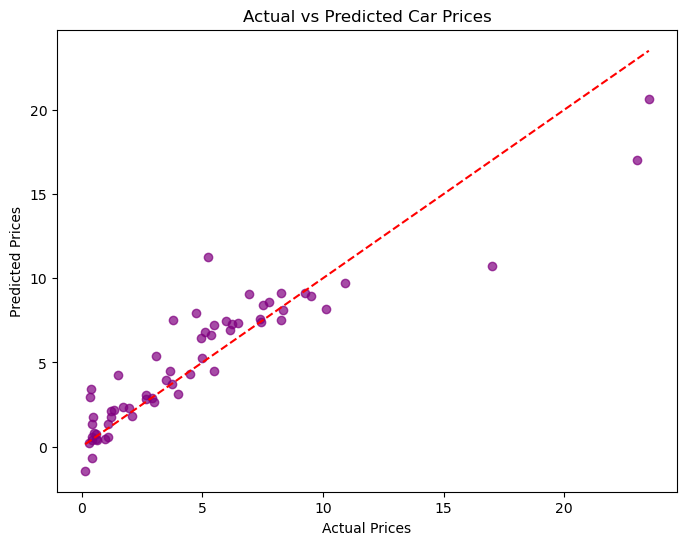

In [10]:
# Here, Scatter plot of actual vs predicted prices
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='purple')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Car Prices')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.show()




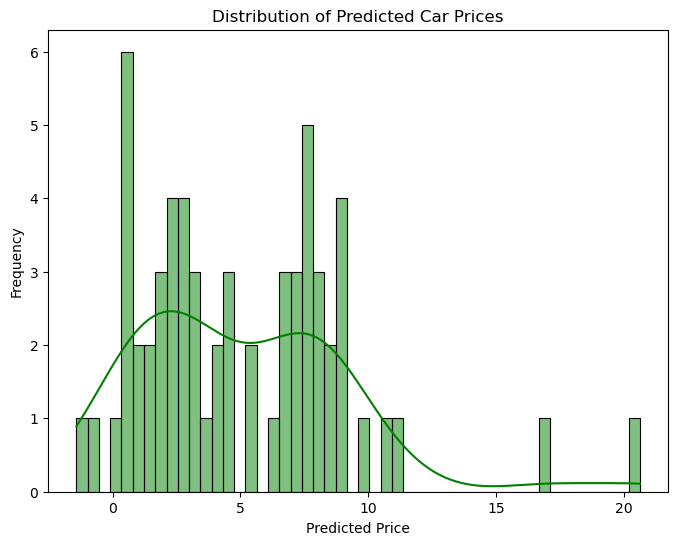

In [11]:
# Here, visual of distribution of predicted car prices
plt.figure(figsize=(8, 6))
sns.histplot(y_pred, bins=50, kde=True, color='green')
plt.title('Distribution of Predicted Car Prices')
plt.xlabel('Predicted Price')
plt.ylabel('Frequency')
plt.show()

In [16]:
# Here, new car prediction by user input
print("\nEnter the details of the car you want to predict the price for:")
year = int(input("Car Year: "))
present_price = float(input("Present Price (in INR): "))
driven_kms = float(input("Driven Kilometers: "))
fuel_type = input("Fuel Type (Petrol/Diesel): ").strip()  # Remove any leading/trailing spaces
selling_type = input("Selling Type (Dealer/Individual): ").strip()  # Remove any leading/trailing spaces
transmission = input("Transmission Type (Manual/Automatic): ").strip()  # Remove any leading/trailing spaces
owner = int(input("Owner (1 for First Owner, 2 for Second Owner, etc.): "))

# Here, Creating a DataFrame for the user input
user_input = pd.DataFrame({
    'Year': [year],
    'Present_Price': [present_price],
    'Driven_kms': [driven_kms],
    'Fuel_Type': [fuel_type],
    'Selling_type': [selling_type],
    'Transmission': [transmission],
    'Owner': [owner]
})

# Here, Useing the trained model to make a prediction
predicted_price = pipeline.predict(user_input)

print(f"\nPredicted Selling Price for the car: INR {predicted_price[0]:,.2f}")


Enter the details of the car you want to predict the price for:
Car Year: 2012
Present Price (in INR): 23456000
Driven Kilometers: 23
Fuel Type (Petrol/Diesel): Petrol
Selling Type (Dealer/Individual): Dealer
Transmission Type (Manual/Automatic): Automatic 
Owner (1 for First Owner, 2 for Second Owner, etc.): 1

Predicted Selling Price for the car: INR 10,064,263.22


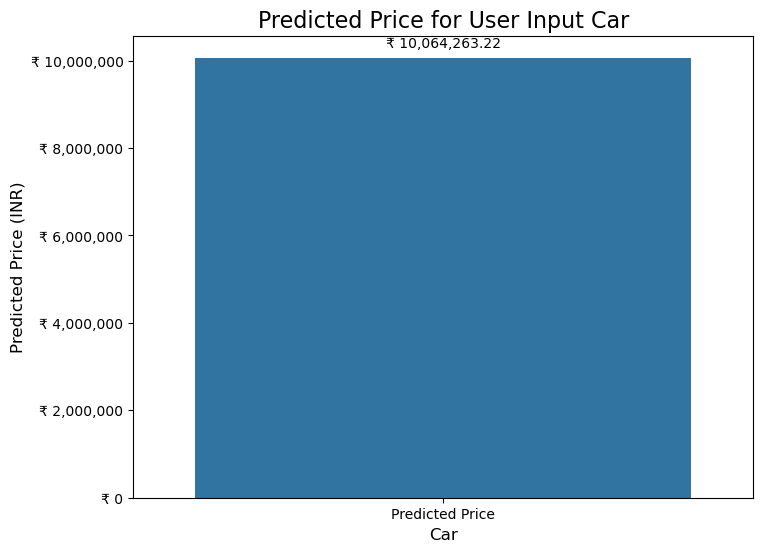

In [17]:
# Here, Bar Graph for Price Prediction
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=['Predicted Price'], y=[predicted_price[0]])
ax.set_title('Predicted Price for User Input Car', fontsize=16)
ax.set_ylabel('Predicted Price (INR)', fontsize=12)
ax.set_xlabel('Car', fontsize=12)

# Here, Formatting the y-axis to show price in INR
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: f'₹ {x:,.0f}'))  # Format to show INR

# Here, Adding the value label on top of the bar (without dividing by 1000)
for p in ax.patches:
    ax.annotate(f'₹ {p.get_height():,.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                xytext=(0, 10), textcoords='offset points', ha='center', va='center')
plt.show()
